<a href="https://colab.research.google.com/github/ihou555/housing_analysis/blob/ihou555/Python_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regional Housing Narratives: A Comparative Analysis of NYC, SF, and LA**

---

## **Introduction**

### **1. Understanding Housing Narratives in Major U.S. Cities**

The housing crisis in the United States is a complex web of challenges that vary across regions. From soaring rents to rising homelessness, housing policies and public discourse reflect the unique economic, cultural, and political landscapes of each city. In this project, I aim to explore how housing narratives differ across three major metropolitan areas: **New York City**, **San Francisco**, and **Los Angeles**.

---

### **2. Research Question**

How do media narratives frame the housing crisis in New York City, San Francisco, and Los Angeles? What do these narratives reveal about each city's unique challenges and priorities, and what themes do they share?

---

### **3. Hypothesis**

- **NYC**: Narratives will emphasize **rent control**, **tenant protections**, and the role of **financial institutions** like banks and lenders in shaping housing policies.
- **SF**: Coverage will focus on **gentrification**, **tech-driven inequality**, and the rising cost of housing as a result of economic disparities.
- **LA**: Articles will center on **homelessness**, **affordable housing**, and the interplay between urban and suburban development.

I also expect that shared themes, such as **homelessness** and **affordable housing**, will emerge across all cities, framed differently to reflect regional concerns.


In [ ]:
import requests
import pandas as pd



---

## **Methodology**

### **1. Data Collection**

#### **APIs Used**
- New York Times (NYT) API
- The Guardian API

#### **Query Design**
- **Keywords**: `"housing"`, `"housing crisis"`, combined with city names.
- **Date Ranges (over the past 10 years)**:
  - 2014–2015
  - 2016–2017
  - 2018–2019
  - 2020–2022
  - 2023–2024

#### **Combining Results**
- **Fields Collected**:
`title`,`date`,`city`, `article_content`
- **Output Dataset**: `Housing_Articles_Regional_Comparison.csv`

#### **Citation for Code**

I used ChatGPT to build this script using the following prompts:

- "What are the necessary parameters to filter articles by date and keyword using the NYT API?"
- "How can I iterate through paginated results in an API response?"
- "Can you include functionality for filtering articles by city and include pagination?"

In [ ]:
import requests
import pandas as pd

# API Keys
NYT_API_KEY = "rHboPcAeHaZ5Ie6Jp3QNN1hqh1B7p8lv"
GUARDIAN_API_KEY = "08fc6e91-fa89-400c-bbca-73fb5078590f"

# Keywords and Cities
keywords = ["housing", "housing crisis"]
cities = ["New York City", "San Francisco", "Los Angeles"]

# Date Range
date_ranges = [
    ("2014-01-01", "2015-12-31"),
    ("2016-01-01", "2017-12-31"),
    ("2018-01-01", "2019-12-31"),
    ("2020-01-01", "2022-12-31"),
    ("2023-01-01", "2023-12-31")
]

# Function to fetch NYT articles
def fetch_nyt_articles(api_key, query, city, start_date, end_date):
    articles = []
    base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
    for keyword in query:
        params = {
            'q': f'{keyword} AND "{city}"',
            'begin_date': start_date.replace("-", ""),
            'end_date': end_date.replace("-", ""),
            'api-key': api_key,
            'sort': 'relevance',
            'page': 0  # Start at page 0
        }
        while True:
            response = requests.get(base_url, params=params).json()
            if 'response' in response and 'docs' in response['response']:
                docs = response['response']['docs']
                for doc in docs:
                    articles.append({
                        'date': doc.get('pub_date', '').split("T")[0],
                        'title': doc['headline'].get('main', ''),
                        'city': city,
                        'article_content': doc.get('lead_paragraph', '')
                    })
                if len(docs) < 10:  # Break if fewer than 10 articles on the page
                    break
                params['page'] += 1  # Increment page
            else:
                break
    return articles

# Function to fetch Guardian articles
def fetch_guardian_articles(api_key, query, city, start_date, end_date):
    articles = []
    base_url = "https://content.guardianapis.com/search"
    for keyword in query:
        params = {
            'q': f'{keyword} AND "{city}"',
            'from-date': start_date,
            'to-date': end_date,
            'api-key': api_key,
            'page-size': 50,
            'show-fields': 'body'
        }
        page = 1
        while True:
            params['page'] = page
            response = requests.get(base_url, params=params).json()
            if 'response' in response and 'results' in response['response']:
                results = response['response']['results']
                for result in results:
                    articles.append({
                        'date': result.get('webPublicationDate', '').split("T")[0],
                        'title': result.get('webTitle', ''),
                        'city': city,
                        'article_content': result['fields'].get('body', '')
                    })
                if not results or len(results) < 50:  # Break if no more results or less than 50 on page
                    break
                page += 1  # Increment page
            else:
                break
    return articles

# Fetch articles from both APIs
nyt_articles = []
guardian_articles = []

for city in cities:
    for start_date, end_date in date_ranges:
        print(f"Fetching NYT articles for {city} from {start_date} to {end_date}...")
        nyt_articles += fetch_nyt_articles(NYT_API_KEY, keywords, city, start_date, end_date)

        print(f"Fetching Guardian articles for {city} from {start_date} to {end_date}...")
        guardian_articles += fetch_guardian_articles(GUARDIAN_API_KEY, keywords, city, start_date, end_date)

# Combine all articles into a single DataFrame
all_articles = pd.DataFrame(nyt_articles + guardian_articles)

# Save to CSV
output_file = "Housing_Articles_Regional_Comparison.csv"
all_articles.to_csv(output_file, index=False)

print(f"Saved all articles to {output_file}.")

### **2. Troubleshooting**

I was working with a large CSV file containing article data. Instead of trying to load the entire file, I attempted to analyze a smaller dataset by using the `nrows=10000` parameter in `pandas.read_csv`. I needed to  test whether the file format, structure, and content were compatible without overloading memory. After reading the first 10,000 rows, the code printed the number of rows loaded (`df.shape[0]`) to confirm that the operation worked as intended. ([Krisel, 2024](https://colab.research.google.com/drive/1KIGgQQwUVgJz_pZCyWCXO3UyPijFTK_d#scrollTo=ItwpN9JfQJjH&line=5&uniqifier=1))


In [ ]:
# Read the first 10,000 rows to test functionality
df = pd.read_csv(file_path, nrows=10000)
print(f"Successfully loaded {df.shape[0]} rows for testing.")

Successfully loaded 10000 rows for testing.


### **3. Preprocessing Text**

First, I used the Natural Language Toolkit (NLTK) for text preprocessing, using **punkt** and **stopwords**. First, I made all text lowercase to ensure uniformity. Then, I stripped out punctuation marks to focus only on words, and broke the cleaned text into individual words. Finally, I filtered out common stopwords.([Krisel, 2024](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)) I applied this preprocessing function to the `article_content` column in my dataset. I saved the cleaned dataset as a new CSV file named `Housing_Articles_Preprocessed_Sample.csv`. ([Krisel, 2024](https://github.com/rskrisel/topic_modeling_workshop/blob/main/topic_modeling_tomotopy_workshop.ipynb))

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the 'article_content' column
df['processed_content'] = df['article_content'].apply(lambda x: preprocess_text(str(x)) if pd.notnull(x) else "")

# Save the preprocessed data
df.to_csv("Housing_Articles_Preprocessed_Sample.csv", index=False)
print("Preprocessing complete! Data saved to 'Housing_Articles_Preprocessed_Sample.csv'.")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing complete! Data saved to 'Housing_Articles_Preprocessed_Sample.csv'.



I separated the articles into three groups based on their city (`NYC`, `SF`, and `LA`).

In [ ]:
# I self-designed this function
# Separate the dataset by city
nyc_data = df[df['city'] == "New York City"]['processed_content']
sf_data = df[df['city'] == "San Francisco"]['processed_content']
la_data = df[df['city'] == "Los Angeles"]['processed_content']

# Check the number of articles for each city
print(f"NYC Articles: {len(nyc_data)}")
print(f"SF Articles: {len(sf_data)}")
print(f"LA Articles: {len(la_data)}")

NYC Articles: 9530
SF Articles: 250
LA Articles: 220


In this step, I began by loading the cleaned dataset (`Housing_Articles_Preprocessed_Sample.csv`) into a DataFrame for further processing. The goal was to sample 200 articles per city, evenly distributed across the years available in the dataset. If there weren’t enough articles for a particular year, the function took all available articles. Then, I extracted the publication year from the `date` column and added it as a new column (`year`). This allowed me to group articles by year for sampling. Finally, I divided the total target number of articles per city (200) by the number of unique years in the dataset to ensure an even distribution across the decade.

#### **Citation for the Code** ####
I used ChatGPT to build this script using the following prompts:

- "How can I sample articles evenly by year from a dataset using pandas?"
- "How can I ensure that articles are sampled evenly across multiple years and cities?"
- "How can I divide a fixed total number of samples evenly across multiple years and groups?"

In [ ]:
import pandas as pd

# Load your dataset
file_path = "Housing_Articles_Preprocessed_Sample.csv"
df = pd.read_csv(file_path)

# Extract the year from the date column
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year

# Define the target number of articles per year
total_articles_per_city = 200
years = sorted(df['year'].dropna().unique())  # Get all unique years
articles_per_year = total_articles_per_city // len(years)  # Divide evenly across years

# Function to sample articles evenly by year
def sample_articles_by_year(city_df, articles_per_year):
    sampled_articles = []
    for year in years:
        year_group = city_df[city_df['year'] == year]
        if not year_group.empty:
            sampled_articles.append(year_group.sample(min(len(year_group), articles_per_year), random_state=42))
    return pd.concat(sampled_articles)

# Sample 200 articles for each city
nyc_sample = sample_articles_by_year(df[df['city'] == "New York City"], articles_per_year)
sf_sample = sample_articles_by_year(df[df['city'] == "San Francisco"], articles_per_year)
la_sample = sample_articles_by_year(df[df['city'] == "Los Angeles"], articles_per_year)

# Combine the sampled articles
sampled_df = pd.concat([nyc_sample, sf_sample, la_sample])

# Save the sampled data to a new CSV
sampled_df.to_csv("Housing_Articles_Sampled_By_City.csv", index=False)
print("Sampled articles saved to 'Housing_Articles_Sampled_By_City.csv'.")

Sampled articles saved to 'Housing_Articles_Sampled_By_City.csv'.


Once the articles were sampled, I noticed some entries in the `processed_content` column were empty or invalid. To clean these, I replaced `NaN` values in the `processed_content` column with empty strings and I dropped rows where the `processed_content` column remained empty after the replacement and cleaning. This step ensured that only valid, meaningful text was retained for analysis. After cleaning, I printed the number of articles remaining for each city.

#### **Citation for the Code**
I used ChatGPT to build this script using the following prompts:

- "How can I replace NaN values with empty strings in a pandas DataFrame?"
- "What is the best way to drop rows where a specific column is empty or has whitespace only?"
- "How can I verify the number of rows remaining in a DataFrame after cleaning?"
- "Can you show me a Python script to clean and validate multiple DataFrames and print their lengths?"

In [ ]:
import numpy as np

# Replace NaN with empty strings and drop rows where 'processed_content' is empty after cleaning
sf_sample['processed_content'] = sf_sample['processed_content'].fillna("")  # Replace NaN with empty strings
sf_sample = sf_sample[sf_sample['processed_content'].str.strip() != ""]  # Drop rows with empty content

la_sample['processed_content'] = la_sample['processed_content'].fillna("")
la_sample = la_sample[la_sample['processed_content'].str.strip() != ""]

nyc_sample['processed_content'] = nyc_sample['processed_content'].fillna("")
nyc_sample = nyc_sample[nyc_sample['processed_content'].str.strip() != ""]

In [ ]:
print(f"NYC Articles After Cleaning: {len(nyc_sample)}")
print(f"SF Articles After Cleaning: {len(sf_sample)}")
print(f"LA Articles After Cleaning: {len(la_sample)}")

NYC Articles After Cleaning: 130
SF Articles After Cleaning: 180
LA Articles After Cleaning: 125


At this point, I decided to refine my preprocessing pipeline further by adding two critical steps to improve data quality. First, I updated the list of stopwords to include domain-specific terms like "pdiv," "state," "Foxtons," "pthe," and similar irrelevant words that appeared frequently but did not contribute meaningfully to the analysis. Then, I identified specific phrases, such as "de Blasio," "San Francisco," "good morning," "New York," and "Los Angeles," that were skewing the topic modeling results. These phrases were removed to focus the analysis on actual thematic content rather than names or generic locations. ([Krisel, 2024](https://github.com/rskrisel/topic_modeling_workshop/blob/main/topic_modeling_tomotopy_workshop.ipynb))

In [ ]:
from nltk.corpus import stopwords

# Define additional stopwords
custom_stopwords = set(stopwords.words('english'))  # Standard English stopwords
additional_stopwords = {"new", "said", "city", "year", "pdiv", "state", "div", "foxtons", "people", "pthe", "say", "p"}  # Add your own words
custom_stopwords.update(additional_stopwords)  # Combine the two sets

In [ ]:
import re
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    """
    Preprocess text by lowercasing, removing specific multi-word phrases, punctuation, and stopwords.
    """
    text = text.lower()  # Convert to lowercase

    # Remove specific multi-word phrases
    multi_word_phrases = ["de Blasio", "San Francisco", "good morning", "New York", "Los Angeles"]
    for phrase in multi_word_phrases:
        text = text.replace(phrase.lower(), "")

    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in custom_stopwords]  # Remove stopwords
    return ' '.join(tokens)  # Join tokens back into a string

Then, I applied the updated preprocessing function to the `processed_content` column for all three cities. The NYC, SF, and LA datasets were processed again with this improved function, and the results were saved to new refined CSV files (`NYC_Sample_Cleaned_Refined.csv`, `SF_Sample_Cleaned_Refined.csv`, and `LA_Sample_Cleaned_Refined.csv`), ensuring a more thorough cleaning process.

In [ ]:
# I self-designed this function
# Apply updated preprocessing to all cities
nyc_sample['processed_content'] = nyc_sample['processed_content'].apply(preprocess_text)
sf_sample['processed_content'] = sf_sample['processed_content'].apply(preprocess_text)
la_sample['processed_content'] = la_sample['processed_content'].apply(preprocess_text)

# Save the cleaned data
nyc_sample.to_csv("NYC_Sample_Cleaned_Refined.csv", index=False)
sf_sample.to_csv("SF_Sample_Cleaned_Refined.csv", index=False)
la_sample.to_csv("LA_Sample_Cleaned_Refined.csv", index=False)

print("Irrelevant phrases removed and cleaned data saved.")

Irrelevant phrases removed and cleaned data saved.


### **4. Extracting Topics for Analysis**

At this point, I defined a function to extract topics. This function iterated over the components of the trained LDA model and retrieved the top `n` words for each topic. The words were then ranked by their importance within each topic. Then, I applied the function to the LDA models for NYC, SF, and LA. Each model generated a list of topics with the top 10 words associated with each.

Finally, the extracted topics were saved to a new CSV file, `City_Topics_Comparison.csv`. ([Krisel, 2024](https://github.com/rskrisel/topic_modeling_workshop/blob/main/topic_modeling_tomotopy_workshop.ipynb))

In [ ]:
def extract_topics(lda_model, feature_names, n_top_words=10):
    topics = []
    for idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[-n_top_words:]]
        topics.append(f"Topic {idx + 1}: " + ", ".join(top_words))
    return topics

# Extract topics for each city
nyc_topics = extract_topics(lda_nyc, vectorizer.get_feature_names_out())
sf_topics = extract_topics(lda_sf, vectorizer.get_feature_names_out())
la_topics = extract_topics(lda_la, vectorizer.get_feature_names_out())

# Save topics to a CSV
topics_df = pd.DataFrame({
    'City': ['NYC'] * len(nyc_topics) + ['SF'] * len(sf_topics) + ['LA'] * len(la_topics),
    'Topic': list(range(1, len(nyc_topics) + 1)) * 3,
    'Top Words': nyc_topics + sf_topics + la_topics
})

topics_df.to_csv("City_Topics_Comparison.csv", index=False)
print("Topics saved to 'City_Topics_Comparison.csv'.")

Topics saved to 'City_Topics_Comparison.csv'.


### **5. Topic Modeling Framework**
I utilized the `CountVectorizer` and `LatentDirichletAllocation (LDA)` models from `sklearn` to extract topics from the cleaned and preprocessed article content. `CountVectorizer` converted the text into a matrix of token counts, which represented the frequency of each word across all documents. I limited the vocabulary to 1,000 words and used English stopwords to exclude common but irrelevant words. ([Krisel, 2024](https://github.com/rskrisel/tf-idf/blob/main/README.md)) The `LDA` identified patterns of word usage across the documents to group words into coherent topics. Using the `processed_content` for each city, the model learns patterns of word co-occurrence to extract topics. For each topic, I retrieved the top 10 words ranked by their contribution to the topic. I ran the topic modeling function separately for the `processed_content` columns of NYC, SF, and LA datasets. ([TowardsDataScience, 2019](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function to perform LDA and extract topics
def perform_topic_modeling(texts, n_topics=10):
    """
    Perform LDA topic modeling and extract top words for each topic.
    """
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(texts)

    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    terms = vectorizer.get_feature_names_out()
    topics = []
    for idx, topic in enumerate(lda.components_):
        topics.append(f"Topic {idx + 1}: " + ", ".join([terms[i] for i in topic.argsort()[-10:]]))
    return lda, topics, vectorizer

# Create 10 topics for NYC
lda_nyc, nyc_topics, nyc_vectorizer = perform_topic_modeling(nyc_sample['processed_content'], n_topics=10)

# Create 10 topics for SF
lda_sf, sf_topics, sf_vectorizer = perform_topic_modeling(sf_sample['processed_content'], n_topics=10)

# Create 10 topics for LA
lda_la, la_topics, la_vectorizer = perform_topic_modeling(la_sample['processed_content'], n_topics=10)

# Print the topics
print("NYC Topics:\n", "\n".join(nyc_topics))
print("\nSF Topics:\n", "\n".join(sf_topics))
print("\nLA Topics:\n", "\n".join(la_topics))

NYC Topics:
 Topic 1: selfemployed, party, immigrants, years, white, election, britain, griffiths, smethwick, labour
Topic 2: help, mortgage, mortgages, mayor, brp, lending, market, homes, york, housing
Topic 3: old, society, age, like, work, says, time, retirement, community, aside
Topic 4: including, villagers, infrastructure, israeli, land, funding, melbourne, local, planning, government
Topic 5: economies, november, classelement, community, span, titleview, itemscope, profile, figure, local
Topic 6: estate, men, young, years, masons, man, mason, american, boyhood, white
Topic 7: agents, estate, property, market, price, buyers, house, like, prices, london
Topic 8: banks, white, abuse, risks, stability, economic, labour, policies, party, financial
Topic 9: government, women, aside, york, food, years, children, housing, citys, homeless
Topic 10: away, branches, sales, years, home, company, business, house, ward, estate

SF Topics:
 Topic 1: come, art, area, house, housing, settled, ca

To consolidate the results, I combined all topics into a single dataset and saved it as `City_Topics_10_Per_City.csv`. This file includes:
- **City**: The city each topic corresponds to.
- **Topic Number**: The topic index for each city.
- **Top Words**: The list of top 10 words defining each topic.

In [ ]:
# Save topics to a CSV file
topics_df = pd.DataFrame({
    'City': ['NYC'] * len(nyc_topics) + ['SF'] * len(sf_topics) + ['LA'] * len(la_topics),
    'Topic': list(range(1, len(nyc_topics) + 1)) * 3,
    'Top Words': nyc_topics + sf_topics + la_topics
})

topics_df.to_csv("City_Topics_10_Per_City.csv", index=False)
print("Topics saved to 'City_Topics_10_Per_City.csv'.")

Topics saved to 'City_Topics_10_Per_City.csv'.



---

## **Results**

#### **1. Extracting Topics as List**

This fuction extracted the top words for each topic modeled by the LDA, and returned a list where each entry corresponded to a topic and included its most important words. The function works by looping through each topic in the LDA model, identifying the top words for each topic using the `argsort()` function to rank words by their importance. The top words are then joined into a string and appended to the list of topics.

I used ChatGPT to build this script using the following prompts:

- "How can I extract the top words for each topic from an LDA model in Python?"
- "How do I create a function to list top words for each topic in a structured format?"
- "Can you help me create topic lists for different datasets (NYC, SF, LA) using LDA?"

In [ ]:
# Function to extract topics and top words
def extract_topics_as_list(lda_model, feature_names, n_top_words=10):
    topics = []
    for idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[-n_top_words:]]
        topics.append(f"Topic {idx + 1}: " + ", ".join(top_words))
    return topics

# Extract topics for each city
nyc_topics_list = extract_topics_as_list(lda_nyc, nyc_vectorizer.get_feature_names_out())
sf_topics_list = extract_topics_as_list(lda_sf, sf_vectorizer.get_feature_names_out())
la_topics_list = extract_topics_as_list(lda_la, la_vectorizer.get_feature_names_out())

To prepare the topics for easy comparison, I combined them into a single DataFrame called `topics_data`, which I saved to a CSV file (`City_Topics_List.csv`). This created a CSV file with the cities, topic numbers, and the top words for each topic. ([Krisel, 2024](https://github.com/rskrisel/topic_modeling_workshop/blob/main/topic_modeling_tomotopy_workshop.ipynb))

In [ ]:
import pandas as pd

# Combine topics into a DataFrame
topics_data = pd.DataFrame({
    'City': ['New York City'] * len(nyc_topics_list) +
            ['San Francisco'] * len(sf_topics_list) +
            ['Los Angeles'] * len(la_topics_list),
    'Topic Number': list(range(1, len(nyc_topics_list) + 1)) +
                    list(range(1, len(sf_topics_list) + 1)) +
                    list(range(1, len(la_topics_list) + 1)),
    'Top Words': nyc_topics_list + sf_topics_list + la_topics_list
})

# Save to CSV
topics_data.to_csv("City_Topics_List.csv", index=False)
print("Topics saved to 'City_Topics_List.csv'.")

Topics saved to 'City_Topics_List.csv'.


| City          |   Topic Number | Top Words                                                                                                     |
|:--------------|---------------:|:--------------------------------------------------------------------------------------------------------------|
| New York City |              1 | Topic 1: selfemployed, party, immigrants, years, white, election, britain, griffiths, smethwick, labour       |
| New York City |              2 | Topic 2: help, mortgage, mortgages, mayor, brp, lending, market, homes, york, housing                         |
| New York City |              3 | Topic 3: old, society, age, like, work, says, time, retirement, community, aside                              |
| New York City |              4 | Topic 4: including, villagers, infrastructure, israeli, land, funding, melbourne, local, planning, government |
| New York City |              5 | Topic 5: economies, november, classelement, community, span, titleview, itemscope, profile, figure, local     |
| New York City |              6 | Topic 6: estate, men, young, years, masons, man, mason, american, boyhood, white                              |
| New York City |              7 | Topic 7: agents, estate, property, market, price, buyers, house, like, prices, london                         |
| New York City |              8 | Topic 8: banks, white, abuse, risks, stability, economic, labour, policies, party, financial                  |
| New York City |              9 | Topic 9: government, women, aside, york, food, years, children, housing, citys, homeless                      |
| New York City |             10 | Topic 10: away, branches, sales, years, home, company, business, house, ward, estate                          |
| San Francisco |              1 | Topic 1: come, art, area, house, housing, settled, california, job, public, home                              |
| San Francisco |              2 | Topic 2: transgender, inmates, houses, views, offer, neighborhood, home, miles, park, citys                   |
| San Francisco |              3 | Topic 3: game, season, world, called, think, chinatown, mayor, york, team, housing                            |
| San Francisco |              4 | Topic 4: day, local, calif, bay, house, companies, technology, home, homeless, years                          |
| San Francisco |              5 | Topic 5: whale, torrey, pines, area, minutes, areas, housing, public, california, house                       |
| San Francisco |              6 | Topic 6: costs, ms, development, residents, mayor, long, build, bay, school, housing                          |
| San Francisco |              7 | Topic 7: expensive, big, district, million, prices, bay, ago, place, area, home                               |
| San Francisco |              8 | Topic 8: major, home, month, california, close, homelessness, condominium, news, californias, housing         |
| San Francisco |              9 | Topic 9: park, minutes, nearby, center, national, housing, pasadena, green, public, house                     |
| San Francisco |             10 | Topic 10: mile, downtown, land, ago, calif, road, santa, san, neighborhood, house                             |
| Los Angeles   |              1 | Topic 1: home, west, homes, whale, years, hollywood, boulevard, house, sunset, council                        |
| Los Angeles   |              2 | Topic 2: away, care, million, near, house, avenue, park, center, housing, hollywood                           |
| Los Angeles   |              3 | Topic 3: privacy, pool, designer, days, covered, air, bel, miles, leaders, house                              |
| Los Angeles   |              4 | Topic 4: adam, coast, democratic, golf, popular, ranch, todays, chief, street, comes                          |
| Los Angeles   |              5 | Topic 5: like, officials, building, southern, near, past, beach, singh, county, neighborhood                  |
| Los Angeles   |              6 | Topic 6: ago, apartment, west, citys, brooklyn, homeless, home, veterans, years, house                        |
| Los Angeles   |              7 | Topic 7: citys, court, einbinder, lippman, howe, county, calif, federal, home, hills                          |
| Los Angeles   |              8 | Topic 8: apartment, art, area, detached, kroener, toledo, la, south, years, campus                            |
| Los Angeles   |              9 | Topic 9: freeway, art, california, exploded, house, fences, 10, long, thousands, good                         |
| Los Angeles   |             10 | Topic 10: recently, urban, known, property, citys, california, buy, american, downtown, neighborhood          |

#### **2. Plotting a Heatmap**
Then, I created a function called to extract the topic distributions for each document in the dataset. The LDA model's `.transform()` method was used to calculate the topic distribution for each document. Then, I created a DataFrame where each column represented a topic, each row corresponded to a document, and the values indicated the proportion of the document associated with each topic. After calculating the topic distributions for NYC, SF, and LA, I concatenated the topic distributions for all three cities into a single DataFrame called `combined_distributions`. Then, I plotted heatmaps for NYC, SF, and LA. ([Krisel, 2024](https://github.com/rskrisel/topic_modeling_workshop/blob/main/topic_modeling_tomotopy_workshop.ipynb))

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Get the topic distributions for each document
def get_topic_distributions(lda_model, X, city_name):
    topic_distributions = lda_model.transform(X)
    df = pd.DataFrame(topic_distributions, columns=[f"Topic {i+1}" for i in range(lda_model.n_components)])
    df['Document'] = range(len(df))
    df['City'] = city_name
    return df

# Generate distributions for each city
nyc_distributions = get_topic_distributions(lda_nyc, X_nyc, "New York City")
sf_distributions = get_topic_distributions(lda_sf, X_sf, "San Francisco")
la_distributions = get_topic_distributions(lda_la, X_la, "Los Angeles")

# Combine distributions
combined_distributions = pd.concat([nyc_distributions, sf_distributions, la_distributions])

# Plot a heatmap of topic distributions for NYC
plt.figure(figsize=(10, 6))
sns.heatmap(nyc_distributions.drop(columns=['Document', 'City']), cmap="YlGnBu", annot=False)
plt.title("Topic Distributions for NYC")
plt.xlabel("Topics")
plt.ylabel("Documents")
plt.show()

# Plot a heatmap for San Francisco
plt.figure(figsize=(10, 6))
sns.heatmap(sf_distributions.drop(columns=['Document', 'City']), cmap="YlGnBu", annot=False)
plt.title("Topic Distributions for San Francisco")
plt.xlabel("Topics")
plt.ylabel("Documents")
plt.show()

# Plot a heatmap for Los Angeles
plt.figure(figsize=(10, 6))
sns.heatmap(la_distributions.drop(columns=['Document', 'City']), cmap="YlGnBu", annot=False)
plt.title("Topic Distributions for Los Angeles")
plt.xlabel("Topics")
plt.ylabel("Documents")
plt.show()

### **Heat Map Observations**

- NYC shows a more diverse thematic spread across documents, with contributions from Topics 2, 7, 9, suggesting a narrative around the lending market, property prices, and government mechanisms.

- SF's heat map demonstrates the most evenly distributed topics from Topics 1, 4, and 6, emphasizing technology, community impact, and costs of development.

- LA finds a strong emphasis on Topics 1, 2, and 6, reflecting urbanization and localized housing issues.

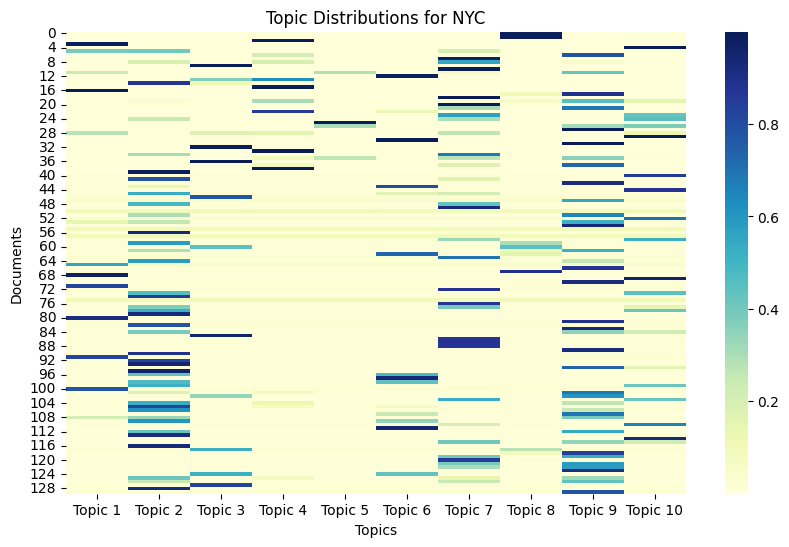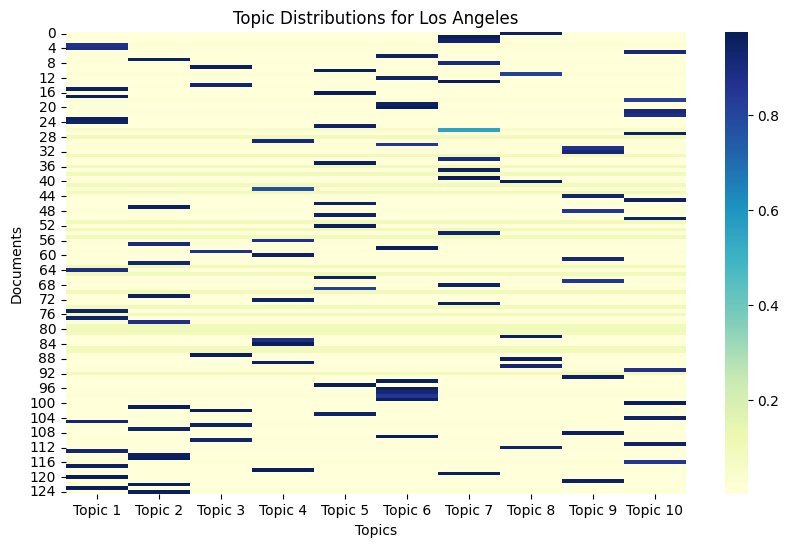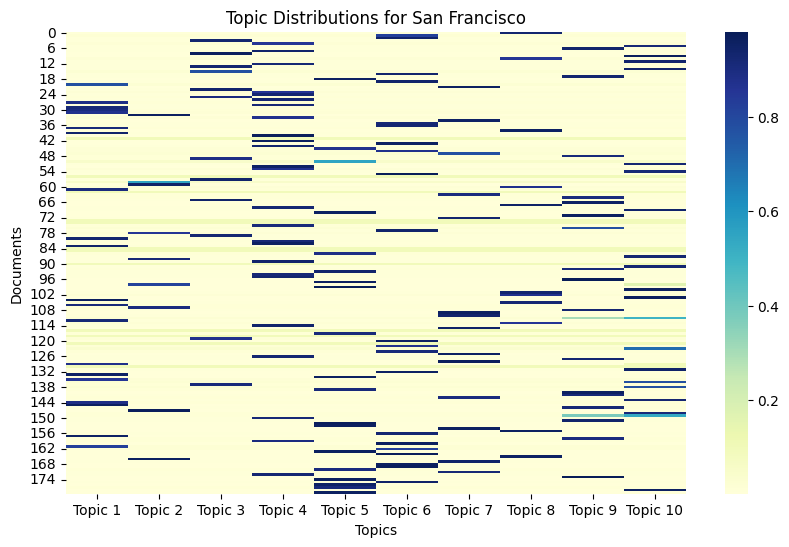

#### **3. Plotting a Grouped Bar Chart**
I defined a function called `get_city_topic_contributions` to calculate the average topic contributions across all documents for each city. First, I removed unnecessary columns like `Document` and `City` from the topic distributions DataFrame to focus only on the topic columns. Then, I calculated the mean contribution for each topic. Finally, I reset the index and renamed the columns to create a clean DataFrame with Topic (the topic number) and Contribution (the average contribution of the topic across documents in the city).

Using the function, I calculated the average topic contributions for NYC, SF, and LA, and concatenated the topic contribution DataFrames for NYC, SF, and LA into a single DataFrame called `city_contributions`. I added a new column `City` to each city-specific DataFrame to label the data and combined all three DataFrames into one, making it easier to compare the topic contributions across cities in a single structure.

Finally, I plotted a grouped bar chart using Seaborn to compare the topic contributions across cities. ([Krisel, 2024](hhttps://github.com/rskrisel/pandas/blob/main/pandas_workshop_2024.ipynb))

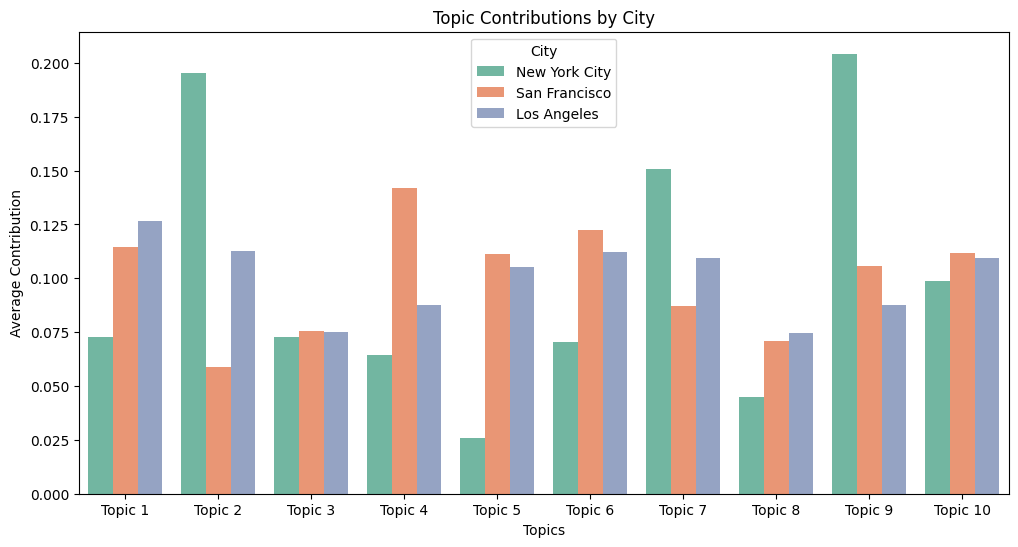

In [ ]:
# Aggregate topic contributions by city
def get_city_topic_contributions(distributions, city_name):
    return distributions.drop(columns=['Document', 'City']).mean().reset_index().rename(columns={0: 'Contribution', 'index': 'Topic'})

nyc_contributions = get_city_topic_contributions(nyc_distributions, "NYC")
sf_contributions = get_city_topic_contributions(sf_distributions, "SF")
la_contributions = get_city_topic_contributions(la_distributions, "LA")

# Combine city contributions
city_contributions = pd.concat([
    nyc_contributions.assign(City="New York City"),
    sf_contributions.assign(City="San Francisco"),
    la_contributions.assign(City="Los Angeles")
])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=city_contributions, x="Topic", y="Contribution", hue="City", palette="Set2")
plt.title("Topic Contributions by City")
plt.xlabel("Topics")
plt.ylabel("Average Contribution")
plt.legend(title="City")
plt.show()

### **City Observations**
1. **New York City**:
   - **Primary Focus**: Topics 2 ("mortgage, lending, housing") and 9 ("government, policies, financial institutions") dominate NYC, reflecting the city’s complex financial and governmental challenges tied to housing and social policies.
   - **Secondary Focus**: Topic 7 ("agents, property, buyers") is also prominent, indicating strong attention on real estate markets and transactions.

2. **San Francisco**:
   - **Primary Focus**: Topics 4 ("companies, technology, housing") and 6 ("costs, development, zoning") have the highest contributions, aligning with the tech-driven housing pressures and urban development themes in San Francisco.
   - **Secondary Focus**: Topic 1 ("housing, settled, job, public") shows relevance, underscoring concerns about regional housing challenges.

3. **Los Angeles**:
   - **Balanced Focus**: Topics 1 ("home, west, housing") and 6 ("freeway, art, housing") stand out slightly, reflecting local housing narratives and infrastructure issues.
   - **Secondary Focus**: Topic 2 ("officials, building, council") is significant, tying into governance and urban planning themes.


### **4. Key Takeaways**
While NYC emphasizes financial mechanisms (Topic 2) and governance (Topic 9), reflecting its role as a financial and political hub, and centers on tenant rights, policy and financial regulation. San Francisco focuses on tech-driven urban development (Topics 4 and 6) and high costs of living (Topic 1), emphasizing gentrification and zoning struggles. Finally, Los Angeles has a broader distribution, with localized themes like homelessness, urban sprawl, and infrastructure (Topics 1 and 6).